In [1]:
# CodeBlock 1
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import datetime as dt
from sqlalchemy import create_engine
pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('seaborn-colorblind')
%matplotlib inline

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# CodeBlock 2
# adding df_country_vaxDeaths
df_country_vaxDeaths = pd.read_csv('data/country_vaccinationDeath.csv', index_col = None, header = 0 )
df_country_vaxDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   Year                     32911 non-null  int64  
 5   total_vaccinations       32911 non-null  int64  
 6   people_vaccinated        32911 non-null  int64  
 7   people_fully_vaccinated  32911 non-null  int64  
 8   New_deaths               32911 non-null  int64  
 9   population               32911 non-null  int64  
 10  ratio                    32911 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.8+ MB


In [3]:
# CodeBlock 3
# dropping Unnamed: 0

df_country_vaxDeaths = df_country_vaxDeaths.drop('Unnamed: 0', axis = 1)
df_country_vaxDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  32911 non-null  object 
 1   iso_code                 32911 non-null  object 
 2   date                     32911 non-null  object 
 3   Year                     32911 non-null  int64  
 4   total_vaccinations       32911 non-null  int64  
 5   people_vaccinated        32911 non-null  int64  
 6   people_fully_vaccinated  32911 non-null  int64  
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  int64  
 9   ratio                    32911 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.5+ MB


In [4]:
# CodeBlock 3
# renaming Russia and UK
df_country_vaxDeaths = df_country_vaxDeaths.replace('Russian Federation', 'Russia')
df_country_vaxDeaths = df_country_vaxDeaths.replace('The United Kingdom', 'United Kingdom')

In [5]:
# CodeBlock 4
# adding df_country_vax_detail

df_country_vax_detail = pd.read_csv('data/country_vaccinations.csv', index_col = None, header = 0 )
df_country_vax_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   Year                                 86512 non-null  int64  
 4   total_vaccinations                   43607 non-null  float64
 5   people_vaccinated                    41294 non-null  float64
 6   people_fully_vaccinated              38802 non-null  float64
 7   daily_vaccinations_raw               35362 non-null  float64
 8   daily_vaccinations                   86213 non-null  float64
 9   total_vaccinations_per_hundred       43607 non-null  float64
 10  people_vaccinated_per_hundred        41294 non-null  float64
 11  people_fully_vaccinated_per_

In [6]:
# CodeBlock 5
# viewing data

df_country_vax_detail.head()

,country,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [7]:
# CodeBlock 6
# renaming date to date_detail
df_country_vax_detail = df_country_vax_detail.rename(columns = {'date':'date_detail'})
df_country_vax_detail

,country,iso_code,date_detail,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,3/25/2022,2022,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,3/26/2022,2022,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,3/27/2022,2022,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,3/28/2022,2022,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [8]:
# CodeBlock 7
# df_country_vax_Summary
df_country_vax_Summary = pd.read_csv('data/country_vaccinations_by_manufacturer.csv', index_col = None, header = 0 )
df_country_vax_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   Year                35623 non-null  int64 
 3   vaccine             35623 non-null  object
 4   total_vaccinations  35623 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [9]:
# CodeBlock 8
# renaming location to country
df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'location':'country'})
df_country_vax_Summary

,country,date,Year,vaccine,total_vaccinations
0,Argentina,12/29/2020,2020,Moderna,2
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca,3
2,Argentina,12/29/2020,2020,Sinopharm/Beijing,1
3,Argentina,12/29/2020,2020,Sputnik V,20481
4,Argentina,12/30/2020,2020,Moderna,2
...,...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca,67403106
35619,European Union,3/29/2022,2022,Pfizer/BioNTech,600519998
35620,European Union,3/29/2022,2022,Sinopharm/Beijing,2301516
35621,European Union,3/29/2022,2022,Sinovac,1809


In [10]:
# CodeBlock 9
# drop total vaccinations for df_country_vax_Summary

df_country_vax_Summary = df_country_vax_Summary.drop(['total_vaccinations'], axis = 1)
df_country_vax_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  35623 non-null  object
 1   date     35623 non-null  object
 2   Year     35623 non-null  int64 
 3   vaccine  35623 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [11]:
# CodeBlock 10
# renaming date to date_summary

df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'date':'date_summary'})
df_country_vax_Summary

,country,date_summary,Year,vaccine
0,Argentina,12/29/2020,2020,Moderna
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca
2,Argentina,12/29/2020,2020,Sinopharm/Beijing
3,Argentina,12/29/2020,2020,Sputnik V
4,Argentina,12/30/2020,2020,Moderna
...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca
35619,European Union,3/29/2022,2022,Pfizer/BioNTech
35620,European Union,3/29/2022,2022,Sinopharm/Beijing
35621,European Union,3/29/2022,2022,Sinovac


In [12]:
# CodeBlock 11
# renaming Year to Year_Summary
df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'Year':'Year_summary'})
df_country_vax_Summary

,country,date_summary,Year_summary,vaccine
0,Argentina,12/29/2020,2020,Moderna
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca
2,Argentina,12/29/2020,2020,Sinopharm/Beijing
3,Argentina,12/29/2020,2020,Sputnik V
4,Argentina,12/30/2020,2020,Moderna
...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca
35619,European Union,3/29/2022,2022,Pfizer/BioNTech
35620,European Union,3/29/2022,2022,Sinopharm/Beijing
35621,European Union,3/29/2022,2022,Sinovac


In [13]:
# CodeBlock 12
# renaming total_vaccinations to total_vaccinations_Summary

df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'total_vaccinations':'total_vaccinations_Summary'})
df_country_vax_Summary

,country,date_summary,Year_summary,vaccine
0,Argentina,12/29/2020,2020,Moderna
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca
2,Argentina,12/29/2020,2020,Sinopharm/Beijing
3,Argentina,12/29/2020,2020,Sputnik V
4,Argentina,12/30/2020,2020,Moderna
...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca
35619,European Union,3/29/2022,2022,Pfizer/BioNTech
35620,European Union,3/29/2022,2022,Sinopharm/Beijing
35621,European Union,3/29/2022,2022,Sinovac


In [14]:
# CodeBlock 13
# importing df_CovidCases_Europe
df_CovidCases_Europe = pd.read_csv('data/CovidCasesEurope.csv', index_col = None, header = 0 )
df_CovidCases_Europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1048575 non-null  int64  
 1   date of report    1048575 non-null  object 
 2   Year              1048575 non-null  int64  
 3   cases             1048575 non-null  int64  
 4   country           1048575 non-null  object 
 5   qry               1048575 non-null  object 
 6   lat               1048575 non-null  float64
 7   long              1048575 non-null  float64
 8   dayofyear         1048575 non-null  int64  
 9   year              1048575 non-null  int64  
 10  lengthofday       1048575 non-null  float64
 11  delta             1048575 non-null  float64
 12  delta2            1048575 non-null  float64
 13  normilized_cases  1048575 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 112.0+ MB


In [15]:
# CodeBlock 14
# checking data

df_CovidCases_Europe.head()

,Unnamed: 0,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,4588298,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,4588299,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,4588300,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,4588301,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,4588302,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0


In [16]:
# CodeBlock 15
# dropping Unnamed: 0

df_CovidCases_Europe = df_CovidCases_Europe.drop('Unnamed: 0', axis = 1)
df_CovidCases_Europe

,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/27/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,27,2021,10.275160,0.038423,0.000817,0.0
1048571,1/28/2021,2021,38,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,28,2021,10.314382,0.039222,0.000799,0.0
1048572,1/29/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,29,2021,10.354386,0.040004,0.000782,0.0
1048573,1/30/2021,2021,62,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,30,2021,10.395154,0.040768,0.000764,0.0


In [17]:
# CodeBlock 16
# merging df_vaccine_all

df_country_vax_Summary = df_country_vax_Summary.reset_index()
df_country_vaxDeaths = df_country_vaxDeaths.reset_index()
#df_vaccine_all = pd.concat(df_country_vax_Summary,df_country_vaxDeaths)
df_vaccine_all = pd.merge(df_country_vax_Summary, df_country_vaxDeaths, how='outer', on='country')
df_vaccine_all.head()

,index_x,country,date_summary,Year_summary,vaccine,index_y,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0.0,Argentina,12/29/2020,2020.0,Moderna,438.0,ARG,12/29/2020,2020.0,20487.0,20482.0,5.0,191.0,45847428.0,0.044674
1,0.0,Argentina,12/29/2020,2020.0,Moderna,439.0,ARG,12/30/2020,2020.0,40589.0,40579.0,10.0,212.0,45847428.0,0.088509
2,0.0,Argentina,12/29/2020,2020.0,Moderna,440.0,ARG,12/31/2020,2020.0,43394.0,43384.0,10.0,113.0,45847428.0,0.094627
3,0.0,Argentina,12/29/2020,2020.0,Moderna,441.0,ARG,1/1/2021,2021.0,43521.0,43511.0,10.0,66.0,45847428.0,0.094904
4,0.0,Argentina,12/29/2020,2020.0,Moderna,442.0,ARG,1/2/2021,2021.0,46833.0,46821.0,12.0,148.0,45847428.0,0.102124


In [18]:
# CodeBlock 17
# dropping indexs

df_vaccine_all = df_vaccine_all.drop([ 'index_x', 'index_y'], axis = 1)
df_vaccine_all

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Argentina,12/29/2020,2020.0,Moderna,ARG,12/29/2020,2020.0,20487.0,20482.0,5.0,191.0,45847428.0,0.044674
1,Argentina,12/29/2020,2020.0,Moderna,ARG,12/30/2020,2020.0,40589.0,40579.0,10.0,212.0,45847428.0,0.088509
2,Argentina,12/29/2020,2020.0,Moderna,ARG,12/31/2020,2020.0,43394.0,43384.0,10.0,113.0,45847428.0,0.094627
3,Argentina,12/29/2020,2020.0,Moderna,ARG,1/1/2021,2021.0,43521.0,43511.0,10.0,66.0,45847428.0,0.094904
4,Argentina,12/29/2020,2020.0,Moderna,ARG,1/2/2021,2021.0,46833.0,46821.0,12.0,148.0,45847428.0,0.102124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826022,Zimbabwe,NaN,NaN,NaN,ZWE,3/25/2022,2022.0,8691642.0,4814582.0,3473523.0,2.0,15229891.0,31.612715
9826023,Zimbabwe,NaN,NaN,NaN,ZWE,3/26/2022,2022.0,8791728.0,4886242.0,3487962.0,2.0,15229891.0,32.083237
9826024,Zimbabwe,NaN,NaN,NaN,ZWE,3/27/2022,2022.0,8845039.0,4918147.0,3493763.0,1.0,15229891.0,32.292726
9826025,Zimbabwe,NaN,NaN,NaN,ZWE,3/28/2022,2022.0,8934360.0,4975433.0,3501493.0,1.0,15229891.0,32.668868


In [19]:
# CodeBlock 18
# checking data

df_vaccine_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826027 entries, 0 to 9826026
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   country                  object 
 1   date_summary             object 
 2   Year_summary             float64
 3   vaccine                  object 
 4   iso_code                 object 
 5   date                     object 
 6   Year                     float64
 7   total_vaccinations       float64
 8   people_vaccinated        float64
 9   people_fully_vaccinated  float64
 10  New_deaths               float64
 11  population               float64
 12  ratio                    float64
dtypes: float64(8), object(5)
memory usage: 1.0+ GB


In [20]:
# CodeBlock 19
# filling in nulls with 0

df_vaccine_all = df_vaccine_all.fillna(0)
df_vaccine_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826027 entries, 0 to 9826026
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   country                  object 
 1   date_summary             object 
 2   Year_summary             float64
 3   vaccine                  object 
 4   iso_code                 object 
 5   date                     object 
 6   Year                     float64
 7   total_vaccinations       float64
 8   people_vaccinated        float64
 9   people_fully_vaccinated  float64
 10  New_deaths               float64
 11  population               float64
 12  ratio                    float64
dtypes: float64(8), object(5)
memory usage: 1.0+ GB


In [21]:
# CodeBlock 19
# describing total vaccinations

df_vaccine_all['total_vaccinations'].describe()

count    9.826027e+06
mean     3.220512e+07
std      4.342694e+07
min      0.000000e+00
25%      2.218793e+06
50%      1.074017e+07
75%      4.697966e+07
max      3.243599e+09
Name: total_vaccinations, dtype: float64

In [22]:
# CodeBlock 20
# describing ratio of total vaccinations

df_vaccine_all['ratio'].describe()

count    9.826027e+06
mean     4.642293e+01
std      3.047117e+01
min      0.000000e+00
25%      1.474807e+01
50%      5.367932e+01
75%      7.448407e+01
max      1.247374e+02
Name: ratio, dtype: float64

In [23]:
# CodeBlock 21
# Checking info
df_CovidCases_Europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date of report    1048575 non-null  object 
 1   Year              1048575 non-null  int64  
 2   cases             1048575 non-null  int64  
 3   country           1048575 non-null  object 
 4   qry               1048575 non-null  object 
 5   lat               1048575 non-null  float64
 6   long              1048575 non-null  float64
 7   dayofyear         1048575 non-null  int64  
 8   year              1048575 non-null  int64  
 9   lengthofday       1048575 non-null  float64
 10  delta             1048575 non-null  float64
 11  delta2            1048575 non-null  float64
 12  normilized_cases  1048575 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 104.0+ MB


In [24]:
# CodeBlock 22
# describing lengthofday

df_CovidCases_Europe['lengthofday'].describe()

count    1.048575e+06
mean     1.352943e+01
std      3.021219e+00
min      7.742285e+00
25%      1.074121e+01
50%      1.342631e+01
75%      1.614536e+01
max      2.006000e+01
Name: lengthofday, dtype: float64

In [25]:
# CodeBlock 23
# describing cases

df_CovidCases_Europe['cases'].describe()

count    1.048575e+06
mean     8.923526e+01
std      3.724366e+02
min      0.000000e+00
25%      2.000000e+00
50%      1.200000e+01
75%      6.100000e+01
max      3.490400e+04
Name: cases, dtype: float64

In [26]:
# CodeBlock 24
# filtering to a specific countries within df_vaccine_all

country_list = ['Germany','Italy', 'France', 'United Kingdom', 'Spain', 'Russia', 'China', 'Japan', 'India', 'Hungary']
df_vaccine_all = df_vaccine_all[df_vaccine_all['country'].isin(country_list)]
df_vaccine_all

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
2930571,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/2/2021,2021.0,3856.0,3855.0,1.0,133.0,65520147.0,0.005884
2930572,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/3/2021,2021.0,4250.0,4249.0,1.0,156.0,65520147.0,0.006485
2930573,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/4/2021,2021.0,6324.0,6323.0,1.0,116.0,65520147.0,0.009650
2930574,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/5/2021,2021.0,13134.0,13131.0,3.0,376.0,65520147.0,0.020041
2930575,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/6/2021,2021.0,25409.0,25402.0,7.0,867.0,65520147.0,0.038770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824836,United Kingdom,0,0.0,0,GBR,3/24/2022,2022.0,140830644.0,52759213.0,49352885.0,227.0,68401087.0,77.132127
9824837,United Kingdom,0,0.0,0,GBR,3/25/2022,2022.0,140867776.0,52764899.0,49366211.0,207.0,68401087.0,77.140439
9824838,United Kingdom,0,0.0,0,GBR,3/26/2022,2022.0,140914631.0,52775615.0,49385014.0,215.0,68401087.0,77.156106
9824839,United Kingdom,0,0.0,0,GBR,3/27/2022,2022.0,140937817.0,52783242.0,49393056.0,227.0,68401087.0,77.167256


In [27]:
# CodeBlock 25
# filtering to a specific countries within df_CovidCases_Europe

country_list2 = ['Germany','Italy', 'France', 'United Kingdom', 'Spain', 'Hungary']
df_CovidCases_Europe = df_CovidCases_Europe[df_CovidCases_Europe['country'].isin(country_list2)]
df_CovidCases_Europe

,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/27/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,27,2021,10.275160,0.038423,0.000817,0.0
1048571,1/28/2021,2021,38,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,28,2021,10.314382,0.039222,0.000799,0.0
1048572,1/29/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,29,2021,10.354386,0.040004,0.000782,0.0
1048573,1/30/2021,2021,62,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,30,2021,10.395154,0.040768,0.000764,0.0


In [28]:
# CodeBlock 26
# creating df_CovidCases_Germany

df_CovidCases_Germany = df_CovidCases_Europe[df_CovidCases_Europe['country']=='Germany']
df_CovidCases_Germany

,date of report,Year,cases,country,qry,lat,long,dayofyear,year,lengthofday,delta,delta2,normilized_cases
0,3/12/2020,2020,0,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,72,2020,12.603770,0.068237,0.000260,0.0
1,3/14/2020,2020,1,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,74,2020,12.740993,0.068734,0.000245,0.0
2,3/16/2020,2020,2,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,76,2020,12.879166,0.069201,0.000230,0.0
3,3/17/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,77,2020,12.948590,0.069424,0.000223,0.0
4,3/18/2020,2020,7,Germany,lat==52.27464867 & long==9.20890772769406,52.274649,9.208908,78,2020,13.018229,0.069639,0.000215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/27/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,27,2021,10.275160,0.038423,0.000817,0.0
1048571,1/28/2021,2021,38,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,28,2021,10.314382,0.039222,0.000799,0.0
1048572,1/29/2021,2021,74,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,29,2021,10.354386,0.040004,0.000782,0.0
1048573,1/30/2021,2021,62,Germany,lat==48.52720642 & long==13.2703396602736,48.527206,13.270340,30,2021,10.395154,0.040768,0.000764,0.0


In [29]:
# CodeBlock 27
# creating df_vaccine_Germany

df_vaccine_Germany = df_country_vax_detail[df_country_vax_detail['country']=='Germany']
df_vaccine_Germany

,country,iso_code,date_detail,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
28974,Germany,DEU,12/27/2020,2020,24376.0,24357.0,19.0,NaN,NaN,0.03,0.03,0.00,NaN,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28975,Germany,DEU,12/28/2020,2020,42477.0,42394.0,83.0,18101.0,18101.0,0.05,0.05,0.00,216.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28976,Germany,DEU,12/29/2020,2020,93182.0,92446.0,735.0,50705.0,34403.0,0.11,0.11,0.00,410.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28977,Germany,DEU,12/30/2020,2020,157385.0,156615.0,769.0,64203.0,44336.0,0.19,0.19,0.00,528.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
28978,Germany,DEU,12/31/2020,2020,207402.0,206545.0,856.0,50017.0,45756.0,0.25,0.25,0.00,545.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29427,Germany,DEU,3/25/2022,2022,171816715.0,63652350.0,63114548.0,60181.0,49297.0,204.79,75.87,75.23,588.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
29428,Germany,DEU,3/26/2022,2022,171839777.0,63655041.0,63121309.0,23062.0,48508.0,204.81,75.87,75.23,578.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
29429,Germany,DEU,3/27/2022,2022,171849411.0,63655931.0,63124033.0,9634.0,48301.0,204.83,75.87,75.24,576.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/
29430,Germany,DEU,3/28/2022,2022,171885915.0,63659100.0,63132281.0,36504.0,47518.0,204.87,75.87,75.25,566.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Robert Koch Institut,https://impfdashboard.de/


In [30]:
# CodeBlock 28
# creating df_vaccine_Italy

df_vaccine_Italy = df_vaccine_all[df_vaccine_all['country']=='Italy']
df_vaccine_Italy

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
4930316,Italy,12/27/2020,2020.0,Moderna,ITA,1/4/2021,2021.0,196638.0,196638.0,9.0,347.0,60320493.0,0.325989
4930317,Italy,12/27/2020,2020.0,Moderna,ITA,1/5/2021,2021.0,276896.0,276896.0,11.0,348.0,60320493.0,0.459041
4930318,Italy,12/27/2020,2020.0,Moderna,ITA,1/6/2021,2021.0,342075.0,342075.0,13.0,649.0,60320493.0,0.567096
4930319,Italy,12/27/2020,2020.0,Moderna,ITA,1/7/2021,2021.0,434720.0,434720.0,15.0,548.0,60320493.0,0.720684
4930320,Italy,12/27/2020,2020.0,Moderna,ITA,1/8/2021,2021.0,531704.0,531704.0,15.0,414.0,60320493.0,0.881465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667861,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/25/2022,2022.0,135720031.0,50716073.0,47796125.0,182.0,60320493.0,84.077683
5667862,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/26/2022,2022.0,135772999.0,50718827.0,47803667.0,146.0,60320493.0,84.082249
5667863,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/27/2022,2022.0,135785891.0,50719613.0,47805978.0,118.0,60320493.0,84.083552
5667864,Italy,3/29/2022,2022.0,Pfizer/BioNTech,ITA,3/28/2022,2022.0,135830078.0,50721490.0,47811809.0,82.0,60320493.0,84.086664


In [31]:
# CodeBlock 29
# creating df_vaccine_France

df_vaccine_France = df_vaccine_all[df_vaccine_all['country']=='France']
df_vaccine_France

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
2930571,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/2/2021,2021.0,3856.0,3855.0,1.0,133.0,65520147.0,0.005884
2930572,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/3/2021,2021.0,4250.0,4249.0,1.0,156.0,65520147.0,0.006485
2930573,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/4/2021,2021.0,6324.0,6323.0,1.0,116.0,65520147.0,0.009650
2930574,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/5/2021,2021.0,13134.0,13131.0,3.0,376.0,65520147.0,0.020041
2930575,France,12/27/2020,2020.0,Pfizer/BioNTech,FRA,1/6/2021,2021.0,25409.0,25402.0,7.0,867.0,65520147.0,0.038770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675618,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/24/2022,2022.0,141554273.0,53989329.0,52428797.0,100.0,65520147.0,82.401111
3675619,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/25/2022,2022.0,141604288.0,53990843.0,52432867.0,124.0,65520147.0,82.403422
3675620,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/26/2022,2022.0,141632440.0,53991965.0,52435804.0,118.0,65520147.0,82.405134
3675621,France,3/28/2022,2022.0,Pfizer/BioNTech,FRA,3/27/2022,2022.0,141636394.0,53992194.0,52436336.0,65.0,65520147.0,82.405484


In [32]:
# CodeBlock 30
# creating df_vaccine_UK

df_vaccine_UK = df_vaccine_all[df_vaccine_all['country']=='United Kingdom']
df_vaccine_UK

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9824399,United Kingdom,0,0.0,0,GBR,1/10/2021,2021.0,2677971.0,2286572.0,391399.0,989.0,68401087.0,3.342888
9824400,United Kingdom,0,0.0,0,GBR,1/11/2021,2021.0,2843815.0,2431648.0,412167.0,1023.0,68401087.0,3.554984
9824401,United Kingdom,0,0.0,0,GBR,1/12/2021,2021.0,3067541.0,2639309.0,428232.0,1099.0,68401087.0,3.858578
9824402,United Kingdom,0,0.0,0,GBR,1/13/2021,2021.0,3356229.0,2918252.0,437977.0,1132.0,68401087.0,4.266382
9824403,United Kingdom,0,0.0,0,GBR,1/14/2021,2021.0,3678180.0,3234946.0,443234.0,1213.0,68401087.0,4.729378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824836,United Kingdom,0,0.0,0,GBR,3/24/2022,2022.0,140830644.0,52759213.0,49352885.0,227.0,68401087.0,77.132127
9824837,United Kingdom,0,0.0,0,GBR,3/25/2022,2022.0,140867776.0,52764899.0,49366211.0,207.0,68401087.0,77.140439
9824838,United Kingdom,0,0.0,0,GBR,3/26/2022,2022.0,140914631.0,52775615.0,49385014.0,215.0,68401087.0,77.156106
9824839,United Kingdom,0,0.0,0,GBR,3/27/2022,2022.0,140937817.0,52783242.0,49393056.0,227.0,68401087.0,77.167256


In [33]:
# CodeBlock 31
# creating df_vaccine_Spain

df_vaccine_Spain = df_vaccine_all[df_vaccine_all['country']=='Spain']
df_vaccine_Spain

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
8120775,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/18/2021,2021.0,897942.0,895627.0,2315.0,364.0,46736811.0,1.916320
8120776,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/19/2021,2021.0,966097.0,956756.0,9341.0,369.0,46736811.0,2.047114
8120777,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/20/2021,2021.0,1025937.0,1010295.0,15642.0,413.0,46736811.0,2.161669
8120778,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/21/2021,2021.0,1103301.0,1054245.0,49056.0,490.0,46736811.0,2.255706
8120779,Spain,1/8/2021,2021.0,Johnson&Johnson,ESP,1/22/2021,2021.0,1165825.0,1097369.0,68456.0,462.0,46736811.0,2.347976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191834,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/2/2022,2022.0,92726740.0,41079854.0,39083122.0,97.0,46736811.0,87.896143
8191835,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/3/2022,2022.0,92774397.0,41083791.0,39103590.0,79.0,46736811.0,87.904566
8191836,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/10/2022,2022.0,93346088.0,41089269.0,39845453.0,71.0,46736811.0,87.916287
8191837,Spain,3/18/2022,2022.0,Pfizer/BioNTech,ESP,3/16/2022,2022.0,93571317.0,41112436.0,39976615.0,53.0,46736811.0,87.965856


In [34]:
# CodeBlock 32
# creating df_vaccine_Russia

df_vaccine_Russia = df_vaccine_all[df_vaccine_all['country']=='Russia']
df_vaccine_Russia

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9820399,Russia,0,0.0,0,RUS,3/2/2021,2021.0,5249831.0,4158334.0,1091497.0,441.0,145899956.0,2.850127
9820400,Russia,0,0.0,0,RUS,3/3/2021,2021.0,5489342.0,4287423.0,1201919.0,452.0,145899956.0,2.938605
9820401,Russia,0,0.0,0,RUS,3/4/2021,2021.0,6010744.0,4701175.0,1309569.0,475.0,145899956.0,3.222191
9820402,Russia,0,0.0,0,RUS,3/5/2021,2021.0,6301854.0,4908178.0,1393676.0,462.0,145899956.0,3.364071
9820403,Russia,0,0.0,0,RUS,3/6/2021,2021.0,6583873.0,5082127.0,1501746.0,441.0,145899956.0,3.483296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820726,Russia,0,0.0,0,RUS,3/25/2022,2022.0,163065113.0,79621685.0,72712682.0,398.0,145899956.0,54.572796
9820727,Russia,0,0.0,0,RUS,3/26/2022,2022.0,163472534.0,79905693.0,72793010.0,395.0,145899956.0,54.767455
9820728,Russia,0,0.0,0,RUS,3/27/2022,2022.0,163498591.0,79914874.0,72800841.0,338.0,145899956.0,54.773748
9820729,Russia,0,0.0,0,RUS,3/28/2022,2022.0,163513489.0,79920509.0,72808825.0,335.0,145899956.0,54.777610


In [35]:
# CodeBlock 33
# creating df_vaccine_China

df_vaccine_China = df_vaccine_all[df_vaccine_all['country']=='China']
df_vaccine_China

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9809684,China,0,0.0,0,CHN,8/26/2021,2021.0,2.003914e+09,1.072500e+09,8.894390e+08,1.0,1.447065e+09,74.115520
9809685,China,0,0.0,0,CHN,9/6/2021,2021.0,2.113083e+09,1.095000e+09,9.697200e+08,0.0,1.447065e+09,75.670392
9809686,China,0,0.0,0,CHN,9/18/2021,2021.0,2.174043e+09,1.100842e+09,1.022207e+09,0.0,1.447065e+09,76.074105
9809687,China,0,0.0,0,CHN,11/19/2021,2021.0,2.422908e+09,1.225000e+09,1.076308e+09,0.0,1.447065e+09,84.654091
9809688,China,0,0.0,0,CHN,12/28/2021,2021.0,2.795716e+09,1.259967e+09,1.207413e+09,0.0,1.447065e+09,87.070499
9809689,China,0,0.0,0,CHN,1/7/2022,2022.0,2.887772e+09,1.262264e+09,1.215878e+09,0.0,1.447065e+09,87.229234
9809690,China,0,0.0,0,CHN,1/14/2022,2022.0,2.928981e+09,1.263691e+09,1.220584e+09,1.0,1.447065e+09,87.327847
9809691,China,0,0.0,0,CHN,1/21/2022,2022.0,2.960675e+09,1.265034e+09,1.224450e+09,0.0,1.447065e+09,87.420656
9809692,China,0,0.0,0,CHN,1/28/2022,2022.0,2.994162e+09,1.266070e+09,1.227387e+09,0.0,1.447065e+09,87.492249
9809693,China,0,0.0,0,CHN,2/7/2022,2022.0,3.010669e+09,1.266426e+09,1.228340e+09,0.0,1.447065e+09,87.516850


In [36]:
# CodeBlock 34
# creating df_vaccine_Japan

df_vaccine_Japan = df_vaccine_all[df_vaccine_all['country']=='Japan']
df_vaccine_Japan

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
5667866,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/10/2021,2021.0,148950.0,148915.0,35.0,54.0,125802521.0,0.118372
5667867,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/11/2021,2021.0,181184.0,180741.0,443.0,49.0,125802521.0,0.143670
5667868,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/12/2021,2021.0,230542.0,227194.0,3348.0,49.0,125802521.0,0.180596
5667869,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/15/2021,2021.0,290275.0,282398.0,7877.0,30.0,125802521.0,0.224477
5667870,Japan,2/17/2021,2021.0,Pfizer/BioNTech,JPN,3/16/2021,2021.0,359191.0,349844.0,9347.0,32.0,125802521.0,0.278090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729511,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/22/2022,2022.0,248489469.0,102198880.0,100523795.0,131.0,125802521.0,81.237545
5729512,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/23/2022,2022.0,249408158.0,102231099.0,100536048.0,70.0,125802521.0,81.263156
5729513,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/24/2022,2022.0,250187988.0,102258371.0,100547291.0,110.0,125802521.0,81.284835
5729514,Japan,8/4/2021,2021.0,Pfizer/BioNTech,JPN,3/27/2022,2022.0,252334857.0,102370587.0,100593847.0,98.0,125802521.0,81.374035


In [37]:
# CodeBlock 35
# creating df_vaccine_India

df_vaccine_India = df_vaccine_all[df_vaccine_all['country']=='India']
df_vaccine_India

,country,date_summary,Year_summary,vaccine,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
9813297,India,0,0.0,0,IND,2/13/2021,2021.0,8.052454e+06,8044786.0,7668.0,103.0,1.401311e+09,0.574090
9813298,India,0,0.0,0,IND,2/15/2021,2021.0,8.516771e+06,8418653.0,98118.0,90.0,1.401311e+09,0.600770
9813299,India,0,0.0,0,IND,2/16/2021,2021.0,8.857341e+06,8641002.0,216339.0,81.0,1.401311e+09,0.616637
9813300,India,0,0.0,0,IND,2/17/2021,2021.0,9.186757e+06,8844641.0,342116.0,100.0,1.401311e+09,0.631169
9813301,India,0,0.0,0,IND,2/18/2021,2021.0,9.846523e+06,9381591.0,464932.0,101.0,1.401311e+09,0.669487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813691,India,0,0.0,0,IND,3/25/2022,2022.0,1.826266e+09,980435665.0,824764568.0,83.0,1.401311e+09,69.965623
9813692,India,0,0.0,0,IND,3/26/2022,2022.0,1.830285e+09,982687842.0,826360688.0,4100.0,1.401311e+09,70.126342
9813693,India,0,0.0,0,IND,3/27/2022,2022.0,1.831348e+09,983190780.0,826884564.0,149.0,1.401311e+09,70.162233
9813694,India,0,0.0,0,IND,3/28/2022,2022.0,1.833040e+09,984051283.0,827610878.0,31.0,1.401311e+09,70.223640


In [38]:
# CodeBlock 37
# renaming United Kingdom to UK

df_vaccine_all = df_vaccine_all.replace('United Kingdom', 'U.K.')

Text(0, 0.5, 'Covid Cases')

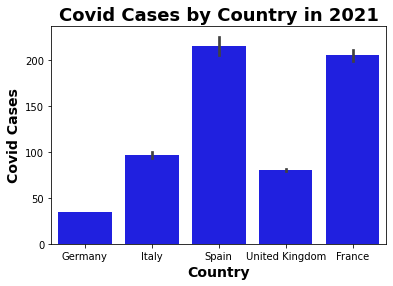

In [39]:
# CodeBlock 38
# Barplot of covid cases by country 2021

sns.barplot(x= 'country', y= 'cases', data = df_CovidCases_Europe[df_CovidCases_Europe['Year']==2021], color = 'b')
plt.title('Covid Cases by Country in 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Country', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Cases', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Covid Deaths')

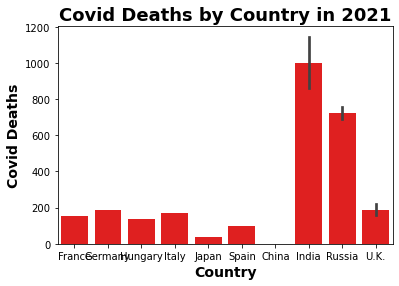

In [40]:
# CodeBlock 39
# Barplot of covid deaths by country 2021

sns.barplot(x= 'country', y= 'New_deaths', data = df_vaccine_all[df_vaccine_all['Year']==2021], color = 'r')
plt.title('Covid Deaths by Country in 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Country', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Deaths', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Total Vaccinations')

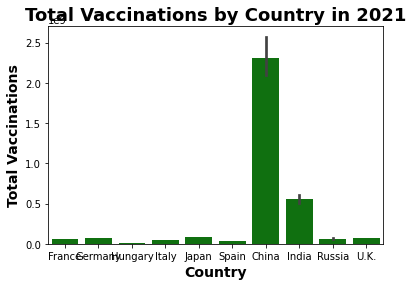

In [41]:
# CodeBlock 40
# Barplot of total vaccinations by country 2021

sns.barplot(x= 'country', y= 'total_vaccinations', data = df_vaccine_all[df_vaccine_all['Year']==2021], color = 'g')
plt.title('Total Vaccinations by Country in 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Country', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Total Vaccinations', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

<AxesSubplot:title={'center':'Total Vaccination Ratio based on Countries for 2021'}, xlabel='country', ylabel='ratio'>

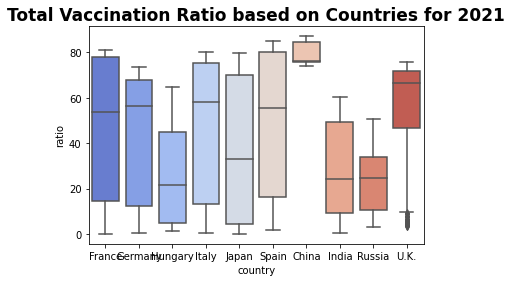

In [42]:
# CodeBlock 41
# Boxplot of total vaccination ratio based on countries

plt.title('Total Vaccination Ratio based on Countries for 2021', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
sns.boxplot(y = "ratio", x = "country", data = df_vaccine_all[df_vaccine_all['Year']==2021], palette = 'coolwarm')

In [43]:
# CodeBlock 42
# upload df_country_vax_Summary

df_country_vax_Summary = pd.read_csv('data/country_vaccinations_by_manufacturer.csv', index_col = None, header = 0 )
df_country_vax_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   Year                35623 non-null  int64 
 3   vaccine             35623 non-null  object
 4   total_vaccinations  35623 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [44]:
# CodeBlock 43
# renaming location to country 

df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'location':'country'})
df_country_vax_Summary

,country,date,Year,vaccine,total_vaccinations
0,Argentina,12/29/2020,2020,Moderna,2
1,Argentina,12/29/2020,2020,Oxford/AstraZeneca,3
2,Argentina,12/29/2020,2020,Sinopharm/Beijing,1
3,Argentina,12/29/2020,2020,Sputnik V,20481
4,Argentina,12/30/2020,2020,Moderna,2
...,...,...,...,...,...
35618,European Union,3/29/2022,2022,Oxford/AstraZeneca,67403106
35619,European Union,3/29/2022,2022,Pfizer/BioNTech,600519998
35620,European Union,3/29/2022,2022,Sinopharm/Beijing,2301516
35621,European Union,3/29/2022,2022,Sinovac,1809


In [45]:
# CodeBlock 44
# creating df_vaccine_Japan 

df_vaccine_Japan = df_country_vax_Summary[df_country_vax_Summary['country']=='Japan']
df_vaccine_Japan

,country,date,Year,vaccine,total_vaccinations
16419,Japan,2/17/2021,2021,Pfizer/BioNTech,125
16420,Japan,2/18/2021,2021,Pfizer/BioNTech,611
16421,Japan,2/19/2021,2021,Pfizer/BioNTech,5039
16422,Japan,2/22/2021,2021,Pfizer/BioNTech,11934
16423,Japan,2/24/2021,2021,Pfizer/BioNTech,17888
...,...,...,...,...,...
16639,Japan,8/2/2021,2021,Pfizer/BioNTech,85373829
16640,Japan,8/3/2021,2021,Moderna,5605114
16641,Japan,8/3/2021,2021,Pfizer/BioNTech,86092639
16642,Japan,8/4/2021,2021,Moderna,5687427


In [46]:
# CodeBlock 45
# creating df_vaccine_Germany 

df_vaccine_Germany = df_country_vax_Summary[df_country_vax_Summary['country']=='Germany']
df_vaccine_Germany

,country,date,Year,vaccine,total_vaccinations
10819,Germany,12/27/2020,2020,Johnson&Johnson,0
10820,Germany,12/27/2020,2020,Moderna,8
10821,Germany,12/27/2020,2020,Novavax,0
10822,Germany,12/27/2020,2020,Oxford/AstraZeneca,1
10823,Germany,12/27/2020,2020,Pfizer/BioNTech,24367
...,...,...,...,...,...
13104,Germany,3/29/2022,2022,Johnson&Johnson,3628087
13105,Germany,3/29/2022,2022,Moderna,29435818
13106,Germany,3/29/2022,2022,Novavax,76908
13107,Germany,3/29/2022,2022,Oxford/AstraZeneca,12757971


In [47]:
df_vaccine_Hungary = df_country_vax_Summary[df_country_vax_Summary['country']=='Hungary']
df_vaccine_Hungary

,country,date,Year,vaccine,total_vaccinations
13893,Hungary,1/1/2021,2021,Pfizer/BioNTech,1095
13894,Hungary,1/8/2021,2021,Pfizer/BioNTech,71815
13895,Hungary,1/15/2021,2021,Moderna,3045
13896,Hungary,1/15/2021,2021,Pfizer/BioNTech,120515
13897,Hungary,1/22/2021,2021,Moderna,3110
...,...,...,...,...,...
14227,Hungary,3/18/2022,2022,Johnson&Johnson,334136
14228,Hungary,3/18/2022,2022,Moderna,1047347
14229,Hungary,3/18/2022,2022,Oxford/AstraZeneca,1252385
14230,Hungary,3/18/2022,2022,Pfizer/BioNTech,9298462


In [48]:
# CodeBlock 46
# groupby vaccine with the sum of total vaccinations

df_vaccine_Japan.groupby('vaccine')[['total_vaccinations']].sum().reset_index()

,vaccine,total_vaccinations
0,Moderna,141520769
1,Pfizer/BioNTech,3768902151


No handles with labels found to put in legend.


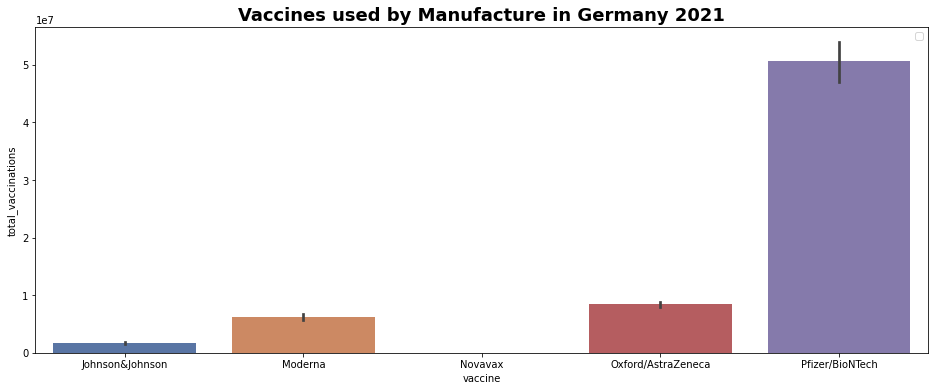

In [49]:
# CodeBlock 47
# Barplot for Vaccines used by Manufacture in Germany 2021

plt.figure(figsize=(16,6))
plt.title('Vaccines used by Manufacture in Germany 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
ax = sns.barplot(y = "total_vaccinations", x = "vaccine", data = df_vaccine_Germany[df_vaccine_Germany['Year']==2021], palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

No handles with labels found to put in legend.


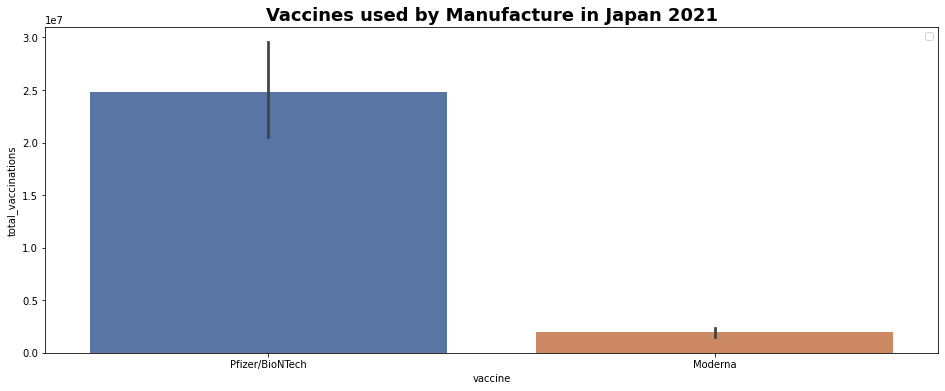

In [50]:
# CodeBlock 48
# Barplot for Vaccines used by Manufacture in Japan 2021

plt.figure(figsize=(16,6))
plt.title('Vaccines used by Manufacture in Japan 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
ax = sns.barplot(y = "total_vaccinations", x = "vaccine", data = df_vaccine_Japan[df_vaccine_Japan['Year']==2021], palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

No handles with labels found to put in legend.


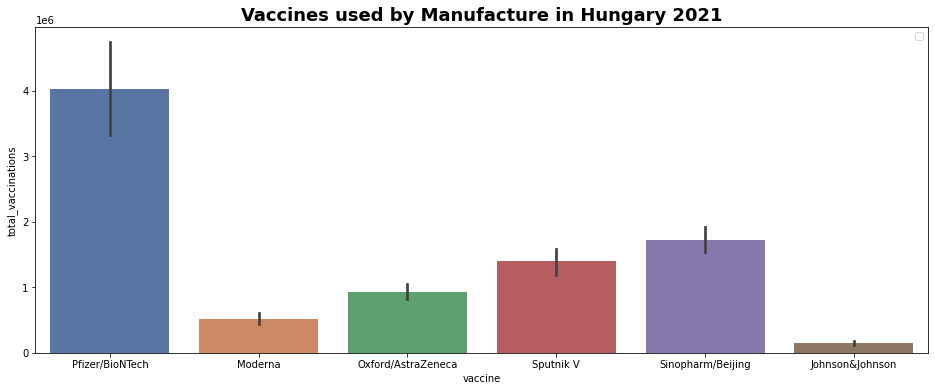

In [85]:
plt.figure(figsize=(16,6))
plt.title('Vaccines used by Manufacture in Hungary 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
ax = sns.barplot(y = "total_vaccinations", x = "vaccine", data = df_vaccine_Hungary[df_vaccine_Hungary['Year']==2021], palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

In [51]:
# CodeBlock 49
# checking info

df_CovidCases_Europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600615 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date of report    600615 non-null  object 
 1   Year              600615 non-null  int64  
 2   cases             600615 non-null  int64  
 3   country           600615 non-null  object 
 4   qry               600615 non-null  object 
 5   lat               600615 non-null  float64
 6   long              600615 non-null  float64
 7   dayofyear         600615 non-null  int64  
 8   year              600615 non-null  int64  
 9   lengthofday       600615 non-null  float64
 10  delta             600615 non-null  float64
 11  delta2            600615 non-null  float64
 12  normilized_cases  600615 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 64.2+ MB


In [52]:
# CodeBlock 50
# reimporting df_country_vaxDeaths

df_country_vaxDeaths = pd.read_csv('data/country_vaccinationDeath.csv', index_col = None, header = 0 )
df_country_vaxDeaths = df_country_vaxDeaths.drop('Unnamed: 0', axis = 1)
df_country_vaxDeaths = df_country_vaxDeaths.replace('Russian Federation', 'Russia')
df_country_vaxDeaths = df_country_vaxDeaths.replace('The United Kingdom', 'United Kingdom')
df_country_vaxDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  32911 non-null  object 
 1   iso_code                 32911 non-null  object 
 2   date                     32911 non-null  object 
 3   Year                     32911 non-null  int64  
 4   total_vaccinations       32911 non-null  int64  
 5   people_vaccinated        32911 non-null  int64  
 6   people_fully_vaccinated  32911 non-null  int64  
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  int64  
 9   ratio                    32911 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.5+ MB


In [53]:
# CodeBlock 50
# checking info

df_country_vax_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             35623 non-null  object
 1   date                35623 non-null  object
 2   Year                35623 non-null  int64 
 3   vaccine             35623 non-null  object
 4   total_vaccinations  35623 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [54]:
# CodeBlock 51
# renaming columns for df_country_vax_Summary

df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'country':'country_summary'})
df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'date':'date_summary'})
df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'Year':'Year_summary'})
df_country_vax_Summary = df_country_vax_Summary.rename(columns = {'total_vaccinations':'total_vaccinations_summary'})
df_country_vax_Summary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country_summary             35623 non-null  object
 1   date_summary                35623 non-null  object
 2   Year_summary                35623 non-null  int64 
 3   vaccine                     35623 non-null  object
 4   total_vaccinations_summary  35623 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [55]:
# CodeBlock 52
# concatinating df_country_vaxDeaths and df_country_vax_Summary and filling in nulls with 0

df_vaxdeath_summary = pd.concat([df_country_vaxDeaths, df_country_vax_Summary], axis = 1 )
df_vaxdeath_summary = df_vaxdeath_summary.fillna(0)

In [56]:
# CodeBlock 53
# checking info
df_vaxdeath_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35623 entries, 0 to 35622
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     35623 non-null  object 
 1   iso_code                    35623 non-null  object 
 2   date                        35623 non-null  object 
 3   Year                        35623 non-null  float64
 4   total_vaccinations          35623 non-null  float64
 5   people_vaccinated           35623 non-null  float64
 6   people_fully_vaccinated     35623 non-null  float64
 7   New_deaths                  35623 non-null  float64
 8   population                  35623 non-null  float64
 9   ratio                       35623 non-null  float64
 10  country_summary             35623 non-null  object 
 11  date_summary                35623 non-null  object 
 12  Year_summary                35623 non-null  int64  
 13  vaccine                     356

In [57]:
# CodeBlock 54
# checking info

df_vaxdeath_Germany = df_vaxdeath_summary[df_vaxdeath_summary['country']=='Germany']

In [86]:
df_vaxdeath_Hungary = df_vaxdeath_summary[df_vaxdeath_summary['country']=='Hungary']

In [58]:
# CodeBlock 55
# excluding objects for df_german

df_german = df_vaxdeath_Germany.select_dtypes(exclude=['object'])
df_german.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 10663 to 11120
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        458 non-null    float64
 1   total_vaccinations          458 non-null    float64
 2   people_vaccinated           458 non-null    float64
 3   people_fully_vaccinated     458 non-null    float64
 4   New_deaths                  458 non-null    float64
 5   population                  458 non-null    float64
 6   ratio                       458 non-null    float64
 7   Year_summary                458 non-null    int64  
 8   total_vaccinations_summary  458 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 35.8 KB


In [59]:
# CodeBlock 56
# importing scaler

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
mm_scaler = preprocessing.MinMaxScaler()
r_scaler = preprocessing.RobustScaler()
n_scaler = preprocessing.Normalizer()

In [60]:
# CodeBlock 57
# creating df_german_sc

df_german_cols = df_german.columns

df_german_sc = scaler.fit_transform(df_german)
df_german_sc = pd.DataFrame(df_german_sc, columns=(df_german_cols))
display(df_german_sc.head())
df_german.head()

,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,Year_summary,total_vaccinations_summary
0,-2.863075,-1.462394,-1.780415,-1.435407,1.914527,0.0,-1.780415,1.275389,-0.372910
1,-2.863075,-1.462083,-1.779634,-1.435404,1.673826,0.0,-1.779634,1.275389,0.366397
2,-2.863075,-1.461211,-1.777468,-1.435378,3.514185,0.0,-1.777468,1.275389,-0.148006
3,-2.863075,-1.460108,-1.774690,-1.435376,5.289355,0.0,-1.774690,1.275389,3.172179
4,-2.863075,-1.459248,-1.772529,-1.435373,5.489939,0.0,-1.772529,1.275389,-0.372909


,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,Year_summary,total_vaccinations_summary
10663,2020.0,24376.0,24357.0,19.0,576.0,83975691.0,0.029005,2022,1085581
10664,2020.0,42477.0,42394.0,83.0,528.0,83975691.0,0.050484,2022,23347518
10665,2020.0,93182.0,92446.0,735.0,895.0,83975691.0,0.110087,2022,7857852
10666,2020.0,157385.0,156615.0,769.0,1249.0,83975691.0,0.186500,2022,107834968
10667,2020.0,207402.0,206545.0,856.0,1289.0,83975691.0,0.245958,2022,1085600


In [61]:
# CodeBlock 57
# importing PCA 

from sklearn.decomposition import PCA
# Set number of principal components for model
n_pcs = 9
model = PCA(n_components=n_pcs)
# Fit the model - return projected data
df_german_pca = model.fit_transform(df_german_sc)
# df_re_pca.columns = df_re_sc.columns
#Create a DataFrame of the projected data
df_german_pca = pd.DataFrame(df_german_pca)
df_german_pca.head()

,0,1,2,3,4,5,6,7,8
0,4.154606,-0.548219,2.397824,0.618256,-0.471108,-0.262922,0.427630,-3.807080e-12,-1.832261e-18
1,4.299288,-0.522618,1.744519,1.009507,-0.435532,-0.304131,0.436333,-7.727918e-12,1.115428e-17
2,4.492735,0.592268,3.230259,1.248905,-0.223836,-0.070344,0.353004,-1.257090e-11,-6.552250e-18
3,5.650127,2.640747,2.057128,3.877243,0.342057,0.090234,0.260109,-1.512048e-11,3.712831e-18
4,4.781099,1.872808,4.601621,1.712618,0.033316,0.177281,0.262495,-1.488588e-11,-1.724608e-17


In [62]:
# CodeBlock 58
# adding column headers
names = []
for x in range(n_pcs):
    names.append('PC%d'%(x+1))
    
df_german_pca.columns = names
df_german_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,4.154606,-0.548219,2.397824,0.618256,-0.471108,-0.262922,0.427630,-3.807080e-12,-1.832261e-18
1,4.299288,-0.522618,1.744519,1.009507,-0.435532,-0.304131,0.436333,-7.727918e-12,1.115428e-17
2,4.492735,0.592268,3.230259,1.248905,-0.223836,-0.070344,0.353004,-1.257090e-11,-6.552250e-18
3,5.650127,2.640747,2.057128,3.877243,0.342057,0.090234,0.260109,-1.512048e-11,3.712831e-18
4,4.781099,1.872808,4.601621,1.712618,0.033316,0.177281,0.262495,-1.488588e-11,-1.724608e-17


In [63]:
# CodeBlock 59
# creating explained_ratio

explained_ratio = model.explained_variance_ratio_
explained_ratio = pd.DataFrame(explained_ratio).reset_index()
explained_ratio = explained_ratio.rename(columns = {0: 'explained_ratio', 'index': 'PC'})
explained_ratio['explained_ratio_sum']= np.cumsum(explained_ratio.explained_ratio)
explained_ratio

,PC,explained_ratio,explained_ratio_sum
0,0,6.621791e-01,0.662179
1,1,1.303384e-01,0.792518
2,2,9.759134e-02,0.890109
3,3,7.043833e-02,0.960547
4,4,3.498310e-02,0.995530
5,5,3.464796e-03,0.998995
6,6,1.004888e-03,1.000000
7,7,5.514576e-22,1.000000
8,8,5.301193e-36,1.000000


In [64]:
# CodeBlock 60
# concatinating df_vaxdeath_Germany and df_german_pca

df_vaxdeath_Germany = pd.DataFrame(df_vaxdeath_Germany).reset_index()
df_german_pca = pd.DataFrame(df_german_pca).reset_index()
df_vaxdeath_Germany = pd.concat([df_vaxdeath_Germany,df_german_pca], axis = 1)

In [65]:
df_vaxdeath_Germany

,index,country,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,country_summary,date_summary,Year_summary,vaccine,total_vaccinations_summary,index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,10663,Germany,DEU,12/27/2020,2020.0,24376.0,24357.0,19.0,576.0,83975691.0,0.029005,France,2/18/2022,2022,Johnson&Johnson,1085581,0,4.154606,-0.548219,2.397824,0.618256,-0.471108,-0.262922,0.427630,-3.807080e-12,-1.832261e-18
1,10664,Germany,DEU,12/28/2020,2020.0,42477.0,42394.0,83.0,528.0,83975691.0,0.050484,France,2/18/2022,2022,Moderna,23347518,1,4.299288,-0.522618,1.744519,1.009507,-0.435532,-0.304131,0.436333,-7.727918e-12,1.115428e-17
2,10665,Germany,DEU,12/29/2020,2020.0,93182.0,92446.0,735.0,895.0,83975691.0,0.110087,France,2/18/2022,2022,Oxford/AstraZeneca,7857852,2,4.492735,0.592268,3.230259,1.248905,-0.223836,-0.070344,0.353004,-1.257090e-11,-6.552250e-18
3,10666,Germany,DEU,12/30/2020,2020.0,157385.0,156615.0,769.0,1249.0,83975691.0,0.186500,France,2/18/2022,2022,Pfizer/BioNTech,107834968,3,5.650127,2.640747,2.057128,3.877243,0.342057,0.090234,0.260109,-1.512048e-11,3.712831e-18
4,10667,Germany,DEU,12/31/2020,2020.0,207402.0,206545.0,856.0,1289.0,83975691.0,0.245958,France,2/19/2022,2022,Johnson&Johnson,1085600,4,4.781099,1.872808,4.601621,1.712618,0.033316,0.177281,0.262495,-1.488588e-11,-1.724608e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,11116,Germany,DEU,3/25/2022,2022.0,171816715.0,63652350.0,63114548.0,276.0,83975691.0,75.798543,Germany,2/24/2021,2021,Novavax,0,453,-2.640720,1.628373,-0.178673,-0.465798,0.202151,0.021017,0.055330,-3.281985e-12,3.154736e-20
454,11117,Germany,DEU,3/26/2022,2022.0,171839777.0,63655041.0,63121309.0,261.0,83975691.0,75.801747,Germany,2/24/2021,2021,Oxford/AstraZeneca,295949,454,-2.651947,1.580083,-0.231762,-0.482459,0.192228,0.011575,0.058956,-3.427346e-11,8.697783e-20
455,11118,Germany,DEU,3/27/2022,2022.0,171849411.0,63655931.0,63124033.0,148.0,83975691.0,75.802807,Germany,2/24/2021,2021,Pfizer/BioNTech,5217343,455,-2.711056,1.238195,-0.692710,-0.552671,0.127157,-0.060000,0.084683,-1.985662e-11,6.416012e-19
456,11119,Germany,DEU,3/28/2022,2022.0,171885915.0,63659100.0,63132281.0,110.0,83975691.0,75.806581,Germany,2/25/2021,2021,Johnson&Johnson,91,456,-2.789499,1.065205,-0.691877,-0.719498,0.083426,-0.080342,0.094402,9.976131e-12,8.245723e-19


In [66]:
# CodeBlock 61
# dropping index

df_vaxdeath_Germany = df_vaxdeath_Germany.drop('index', axis = 1)
df_vaxdeath_Germany

,country,iso_code,date,Year,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,country_summary,date_summary,Year_summary,vaccine,total_vaccinations_summary,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,Germany,DEU,12/27/2020,2020.0,24376.0,24357.0,19.0,576.0,83975691.0,0.029005,France,2/18/2022,2022,Johnson&Johnson,1085581,4.154606,-0.548219,2.397824,0.618256,-0.471108,-0.262922,0.427630,-3.807080e-12,-1.832261e-18
1,Germany,DEU,12/28/2020,2020.0,42477.0,42394.0,83.0,528.0,83975691.0,0.050484,France,2/18/2022,2022,Moderna,23347518,4.299288,-0.522618,1.744519,1.009507,-0.435532,-0.304131,0.436333,-7.727918e-12,1.115428e-17
2,Germany,DEU,12/29/2020,2020.0,93182.0,92446.0,735.0,895.0,83975691.0,0.110087,France,2/18/2022,2022,Oxford/AstraZeneca,7857852,4.492735,0.592268,3.230259,1.248905,-0.223836,-0.070344,0.353004,-1.257090e-11,-6.552250e-18
3,Germany,DEU,12/30/2020,2020.0,157385.0,156615.0,769.0,1249.0,83975691.0,0.186500,France,2/18/2022,2022,Pfizer/BioNTech,107834968,5.650127,2.640747,2.057128,3.877243,0.342057,0.090234,0.260109,-1.512048e-11,3.712831e-18
4,Germany,DEU,12/31/2020,2020.0,207402.0,206545.0,856.0,1289.0,83975691.0,0.245958,France,2/19/2022,2022,Johnson&Johnson,1085600,4.781099,1.872808,4.601621,1.712618,0.033316,0.177281,0.262495,-1.488588e-11,-1.724608e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Germany,DEU,3/25/2022,2022.0,171816715.0,63652350.0,63114548.0,276.0,83975691.0,75.798543,Germany,2/24/2021,2021,Novavax,0,-2.640720,1.628373,-0.178673,-0.465798,0.202151,0.021017,0.055330,-3.281985e-12,3.154736e-20
454,Germany,DEU,3/26/2022,2022.0,171839777.0,63655041.0,63121309.0,261.0,83975691.0,75.801747,Germany,2/24/2021,2021,Oxford/AstraZeneca,295949,-2.651947,1.580083,-0.231762,-0.482459,0.192228,0.011575,0.058956,-3.427346e-11,8.697783e-20
455,Germany,DEU,3/27/2022,2022.0,171849411.0,63655931.0,63124033.0,148.0,83975691.0,75.802807,Germany,2/24/2021,2021,Pfizer/BioNTech,5217343,-2.711056,1.238195,-0.692710,-0.552671,0.127157,-0.060000,0.084683,-1.985662e-11,6.416012e-19
456,Germany,DEU,3/28/2022,2022.0,171885915.0,63659100.0,63132281.0,110.0,83975691.0,75.806581,Germany,2/25/2021,2021,Johnson&Johnson,91,-2.789499,1.065205,-0.691877,-0.719498,0.083426,-0.080342,0.094402,9.976131e-12,8.245723e-19


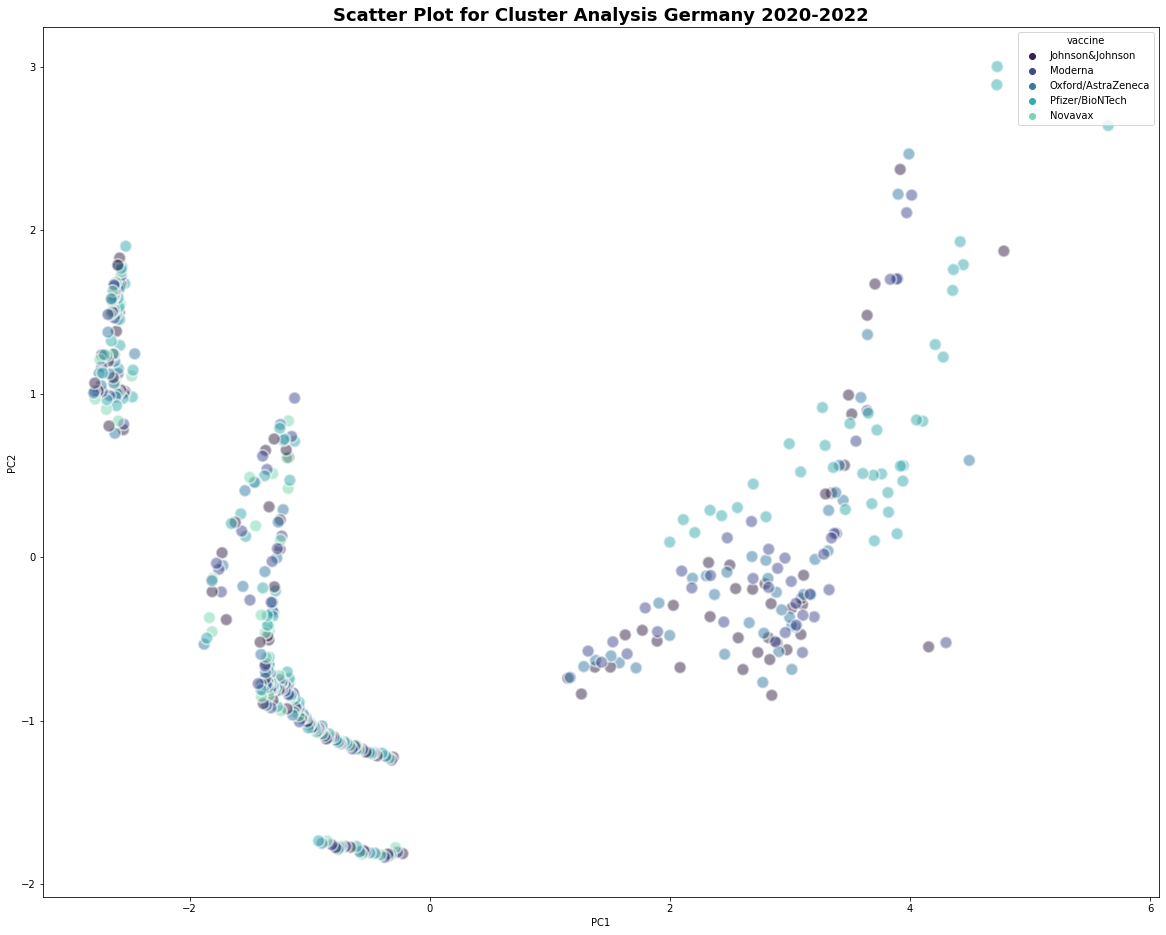

In [67]:
# CodeBlock 62
# scatter plot

plt.figure(figsize=(20,16))
plt.title('Scatter Plot for Cluster Analysis Germany 2020-2022', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
sns.scatterplot(df_vaxdeath_Germany['PC1'], df_vaxdeath_Germany['PC2'], hue = df_vaxdeath_Germany['vaccine'],
alpha=0.5, s = 150, edgecolor='white', linewidth=2, palette='mako')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [68]:
# CodeBlock 63
# creating df_vaxdeath_Germany2021

df_vaxdeath_Germany2021 = df_vaxdeath_Germany[df_vaxdeath_Germany['Year']==2021]

In [87]:
df_vaxdeath_Hungary2021 = df_vaxdeath_Hungary[df_vaxdeath_Hungary['Year']==2021]

Text(0, 0.5, 'Covid Deaths')

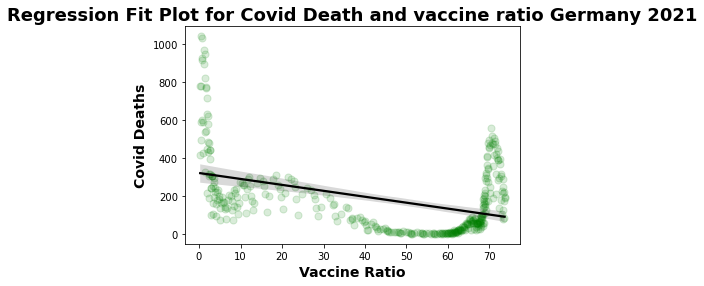

In [69]:
# CodeBlock 64
# regplot

sns.regplot( x='ratio', y='New_deaths', data= df_vaxdeath_Germany2021, scatter_kws={"color":"green","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Death and vaccine ratio Germany 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Vaccine Ratio', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Deaths', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')


Text(0, 0.5, 'Covid Deaths')

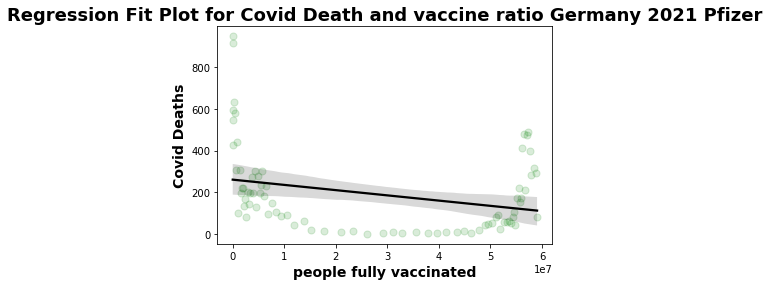

In [70]:
# CodeBlock 65
# regplot

sns.regplot( x='people_fully_vaccinated', y='New_deaths', data= df_vaxdeath_Germany2021[df_vaxdeath_Germany2021['vaccine']=='Pfizer/BioNTech'], scatter_kws={"color":"green","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Death and vaccine ratio Germany 2021 Pfizer', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('people fully vaccinated', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Deaths', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Covid Deaths')

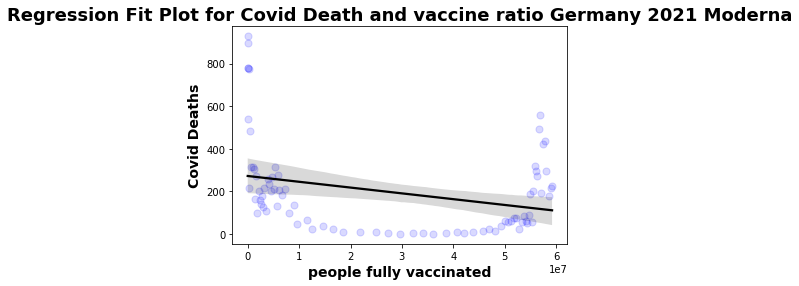

In [71]:
# CodeBlock 66
# regplot

sns.regplot( x='people_fully_vaccinated', y='New_deaths', data= df_vaxdeath_Germany2021[df_vaxdeath_Germany2021['vaccine']=='Moderna'], scatter_kws={"color":"blue","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Death and vaccine ratio Germany 2021 Moderna', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('people fully vaccinated', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Deaths', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Covid Deaths')

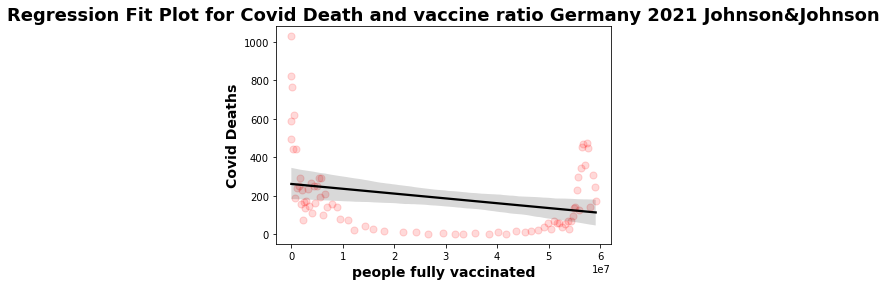

In [72]:
# CodeBlock 67
# regplot

sns.regplot( x='people_fully_vaccinated', y='New_deaths', data= df_vaxdeath_Germany2021[df_vaxdeath_Germany2021['vaccine']=='Johnson&Johnson'], scatter_kws={"color":"red","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Death and vaccine ratio Germany 2021 Johnson&Johnson', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('people fully vaccinated', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Deaths', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

In [73]:
# CodeBlock 65
# regplot

df_vaxdeath_Germany2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 5 to 369
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     365 non-null    object 
 1   iso_code                    365 non-null    object 
 2   date                        365 non-null    object 
 3   Year                        365 non-null    float64
 4   total_vaccinations          365 non-null    float64
 5   people_vaccinated           365 non-null    float64
 6   people_fully_vaccinated     365 non-null    float64
 7   New_deaths                  365 non-null    float64
 8   population                  365 non-null    float64
 9   ratio                       365 non-null    float64
 10  country_summary             365 non-null    object 
 11  date_summary                365 non-null    object 
 12  Year_summary                365 non-null    int64  
 13  vaccine                     365 non

In [74]:
# CodeBlock 66
# checking info

df_CovidCases_Europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600615 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date of report    600615 non-null  object 
 1   Year              600615 non-null  int64  
 2   cases             600615 non-null  int64  
 3   country           600615 non-null  object 
 4   qry               600615 non-null  object 
 5   lat               600615 non-null  float64
 6   long              600615 non-null  float64
 7   dayofyear         600615 non-null  int64  
 8   year              600615 non-null  int64  
 9   lengthofday       600615 non-null  float64
 10  delta             600615 non-null  float64
 11  delta2            600615 non-null  float64
 12  normilized_cases  600615 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 64.2+ MB


In [75]:
# CodeBlock 67
# creating df_CovidCases_Germany

df_CovidCases_Germany = df_CovidCases_Europe[df_CovidCases_Europe['country']=='Germany']

In [76]:
# CodeBlock 68
# creating df_CovidCases_Germany2021

df_CovidCases_Germany2021 = df_CovidCases_Europe[df_CovidCases_Europe['Year']==2021]

In [77]:
# CodeBlock 69
# dropping certain columns

df_CovidCases_Germany2021 = df_CovidCases_Germany2021.drop([ 'date of report', 'Year', 'country', 'qry', 'lat', 'long', 'dayofyear', 'year'], axis = 1)

In [78]:
# CodeBlock 70
# concatinating df_vaxdeath_Germany2021 and df_CovidCases_Germany2021

df_vaxdeath_Germany2021 = df_vaxdeath_Germany2021.reset_index()
df_CovidCases_Germany2021 = df_CovidCases_Germany2021.reset_index()
df_vaxdeath_Germany2021 = pd.concat([df_vaxdeath_Germany2021, df_CovidCases_Germany2021], axis = 1 )
df_vaxdeath_Germany2021 = df_vaxdeath_Germany2021.fillna(0)

In [79]:
# CodeBlock 71
# checking info

df_vaxdeath_Germany2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275292 entries, 0 to 275291
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       275292 non-null  float64
 1   country                     275292 non-null  object 
 2   iso_code                    275292 non-null  object 
 3   date                        275292 non-null  object 
 4   Year                        275292 non-null  float64
 5   total_vaccinations          275292 non-null  float64
 6   people_vaccinated           275292 non-null  float64
 7   people_fully_vaccinated     275292 non-null  float64
 8   New_deaths                  275292 non-null  float64
 9   population                  275292 non-null  float64
 10  ratio                       275292 non-null  float64
 11  country_summary             275292 non-null  object 
 12  date_summary                275292 non-null  object 
 13  Year_summary  

In [80]:
# CodeBlock 72
# dropping index

df_vaxdeath_Germany2021 = df_vaxdeath_Germany2021.drop('index', axis = 1)
df_vaxdeath_Germany2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275292 entries, 0 to 275291
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   country                     275292 non-null  object 
 1   iso_code                    275292 non-null  object 
 2   date                        275292 non-null  object 
 3   Year                        275292 non-null  float64
 4   total_vaccinations          275292 non-null  float64
 5   people_vaccinated           275292 non-null  float64
 6   people_fully_vaccinated     275292 non-null  float64
 7   New_deaths                  275292 non-null  float64
 8   population                  275292 non-null  float64
 9   ratio                       275292 non-null  float64
 10  country_summary             275292 non-null  object 
 11  date_summary                275292 non-null  object 
 12  Year_summary                275292 non-null  float64
 13  vaccine       

Text(0, 0.5, 'Covid Cases')

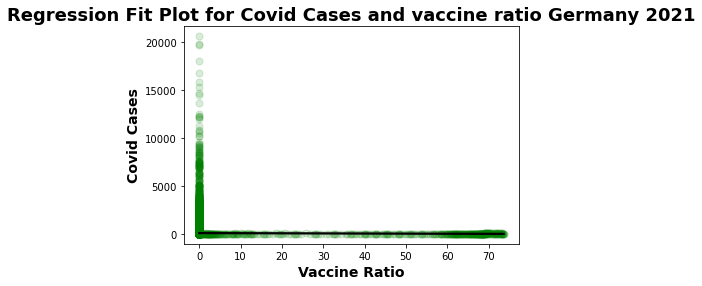

In [81]:
# CodeBlock 73
# regplot

sns.regplot( x='ratio', y='cases', data= df_vaxdeath_Germany2021, scatter_kws={"color":"green","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Cases and vaccine ratio Germany 2021', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('Vaccine Ratio', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Cases', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Covid Cases')

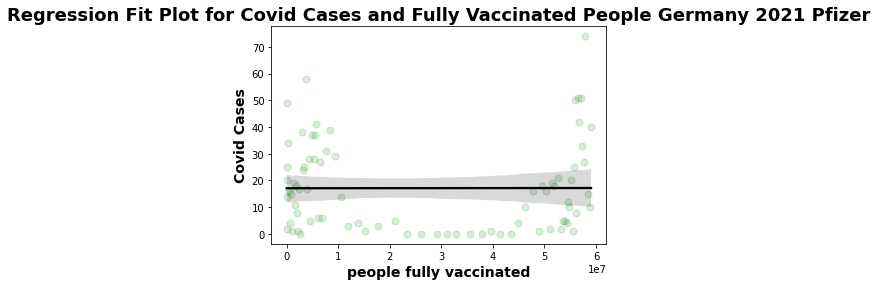

In [82]:
# CodeBlock 74
# regplot

sns.regplot( x='people_fully_vaccinated', y='cases', data= df_vaxdeath_Germany2021[df_vaxdeath_Germany2021['vaccine']=='Pfizer/BioNTech'], scatter_kws={"color":"green","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Cases and Fully Vaccinated People Germany 2021 Pfizer', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('people fully vaccinated', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Cases', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Covid Cases')

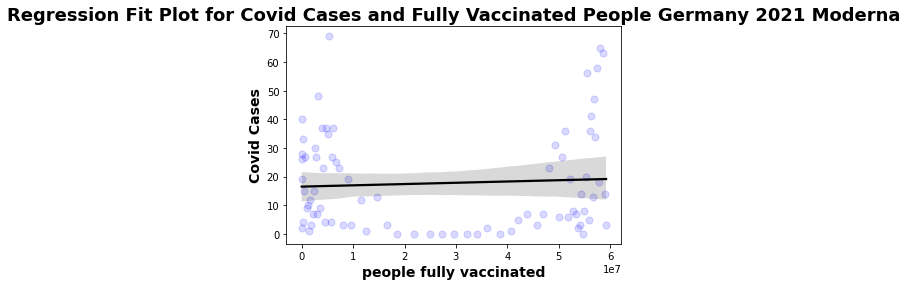

In [83]:
# CodeBlock 75
# regplot

sns.regplot( x='people_fully_vaccinated', y='cases', data= df_vaxdeath_Germany2021[df_vaxdeath_Germany2021['vaccine']=='Moderna'], scatter_kws={"color":"blue","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Cases and Fully Vaccinated People Germany 2021 Moderna', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('people fully vaccinated', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Cases', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')

Text(0, 0.5, 'Covid Cases')

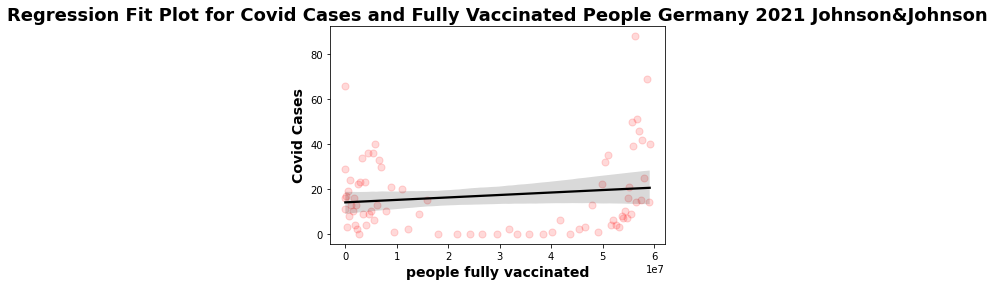

In [84]:
# CodeBlock 76
# regplot

sns.regplot( x='people_fully_vaccinated', y='cases', data= df_vaxdeath_Germany2021[df_vaxdeath_Germany2021['vaccine']=='Johnson&Johnson'], scatter_kws={"color":"red","alpha":0.15,"s":50}, line_kws={'color': 'black'} )
plt.title('Regression Fit Plot for Covid Cases and Fully Vaccinated People Germany 2021 Johnson&Johnson', fontweight = 'bold', fontsize = '18', horizontalalignment = 'center')
plt.xlabel('people fully vaccinated', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')
plt.ylabel('Covid Cases', fontweight = 'bold', fontsize = '14', horizontalalignment = 'center')